In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
# lets suppress the warnings related to forward capatability with seaborn


# Read in CSV data set with Pandas 
full_data = pd.read_csv('data/all_breakdown.csv')

# Display first few rows 
display(full_data.head())


# show high level info on the data set 
display(full_data.info())

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
0,2011-07-21 00:00:00,177.0,372.0,984.0,1.0,516.0,0.0,NaN,NaN,1607.0
1,2011-07-21 01:00:00,176.0,373.0,984.0,2.0,509.0,0.0,NaN,NaN,1619.0
2,2011-07-21 02:00:00,177.0,371.0,985.0,3.0,506.0,0.0,NaN,NaN,1660.0
3,2011-07-21 03:00:00,177.0,374.0,985.0,4.0,504.0,0.0,NaN,NaN,1633.0
4,2011-07-21 04:00:00,177.0,377.0,984.0,5.0,508.0,0.0,NaN,NaN,1520.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67584 entries, 0 to 67583
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TIMESTAMP      67584 non-null  object 
 1   BIOGAS         67584 non-null  float64
 2   BIOMASS        67584 non-null  float64
 3   GEOTHERMAL     67584 non-null  float64
 4   Hour           67584 non-null  float64
 5   SMALL HYDRO    67584 non-null  float64
 6   SOLAR          22680 non-null  float64
 7   SOLAR PV       44904 non-null  float64
 8   SOLAR THERMAL  44904 non-null  float64
 9   WIND TOTAL     67584 non-null  float64
dtypes: float64(9), object(1)
memory usage: 5.2+ MB


None

In [2]:
# fill in na values with 0 
full_data['SOLAR'] = full_data['SOLAR'].fillna(0)
full_data['SOLAR PV'] = full_data['SOLAR PV'].fillna(0)
full_data['SOLAR THERMAL'] = full_data['SOLAR THERMAL'].fillna(0)


# Create a combined columm now that there are no nulls
full_data['SOLAR TOTAL'] = full_data['SOLAR']+full_data['SOLAR PV']+full_data['SOLAR THERMAL']



# Convert timestamp column to pandas datetime data type
full_data['TIMESTAMP'] = pd.to_datetime(full_data['TIMESTAMP'])
full_data['TIMESTAMP'] = pd.to_datetime(full_data['TIMESTAMP'])


# Allows us to acces the "dt" property of column and included methods
full_data['MONTH'] = full_data['TIMESTAMP'].dt.month
full_data['YEAR'] = full_data['TIMESTAMP'].dt.year
full_data['DAY'] = full_data['TIMESTAMP'].dt.day
full_data['HOUR'] = full_data['TIMESTAMP'].dt.hour





full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67584 entries, 0 to 67583
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TIMESTAMP      67584 non-null  datetime64[ns]
 1   BIOGAS         67584 non-null  float64       
 2   BIOMASS        67584 non-null  float64       
 3   GEOTHERMAL     67584 non-null  float64       
 4   Hour           67584 non-null  float64       
 5   SMALL HYDRO    67584 non-null  float64       
 6   SOLAR          67584 non-null  float64       
 7   SOLAR PV       67584 non-null  float64       
 8   SOLAR THERMAL  67584 non-null  float64       
 9   WIND TOTAL     67584 non-null  float64       
 10  SOLAR TOTAL    67584 non-null  float64       
 11  MONTH          67584 non-null  int64         
 12  YEAR           67584 non-null  int64         
 13  DAY            67584 non-null  int64         
 14  HOUR           67584 non-null  int64         
dtypes: datetime64[ns](1

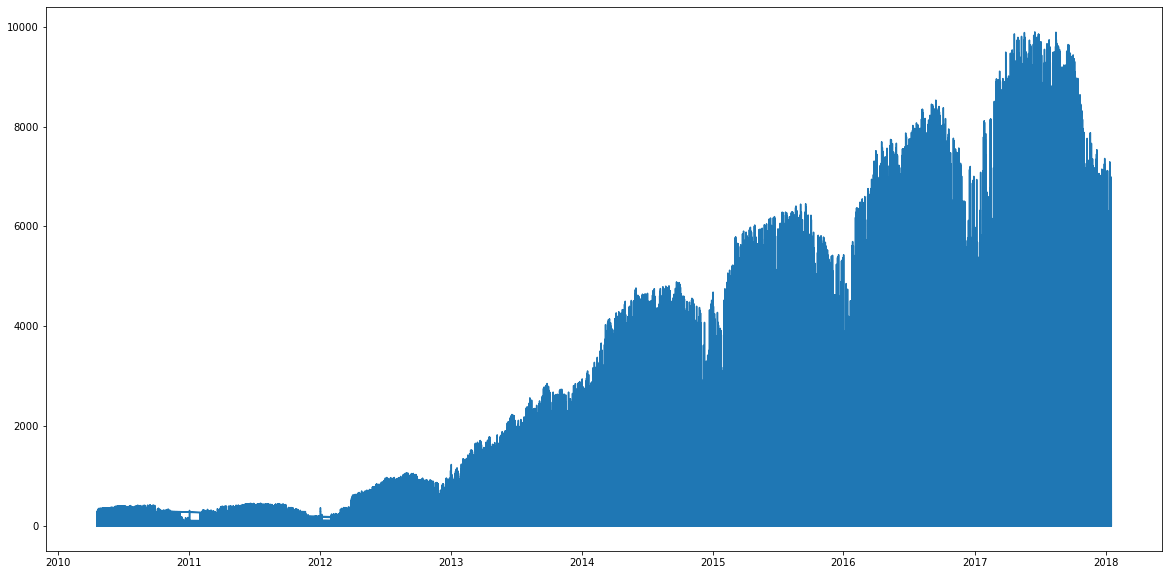

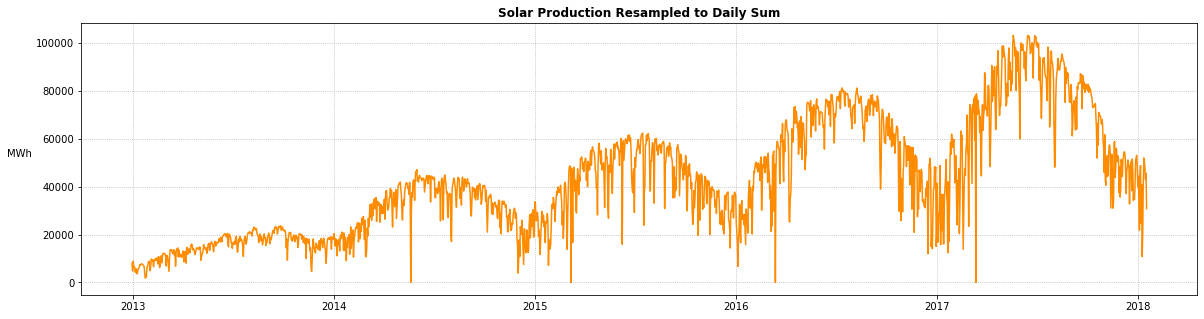

In [40]:
# quickly look at ALL of the data over time 
plt.figure(figsize=(20,10))
plt.plot(full_data.TIMESTAMP, full_data['SOLAR TOTAL'])
plt.show()



# wasn't very helpful, look at the data resampled to one day to see the trend a bit more obviously
test = pd.DataFrame(full_data.loc[full_data.TIMESTAMP > pd.to_datetime('2012-12-31'),['TIMESTAMP', 'SOLAR TOTAL']])
test.set_index(pd.DatetimeIndex(test['TIMESTAMP']), inplace=True)
test = test.resample('24H').sum()
plt.figure(figsize=(20,5))
plt.plot(test.index, test['SOLAR TOTAL'], color='#FF8C00')
plt.title('Solar Production Resampled to Daily Sum', fontweight='bold')
plt.grid(ls=":")
plt.ylabel('MWh', rotation='0',ha='right')
plt.savefig('Charts/resampled_production.png', bbox_inches='tight')
plt.show()


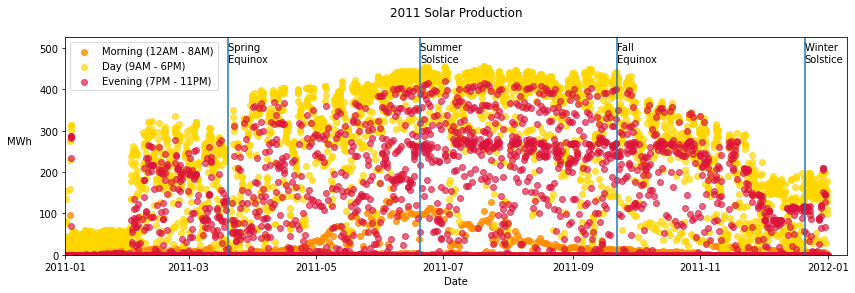

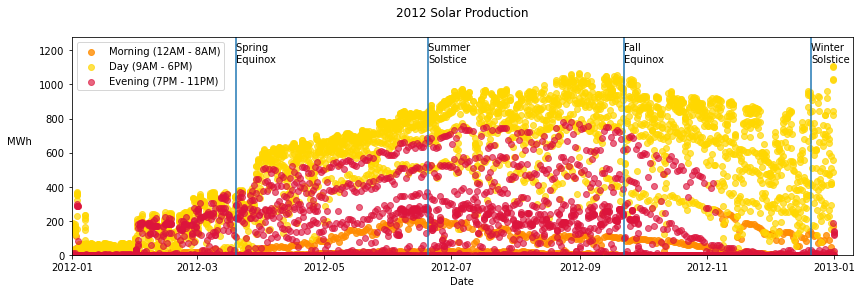

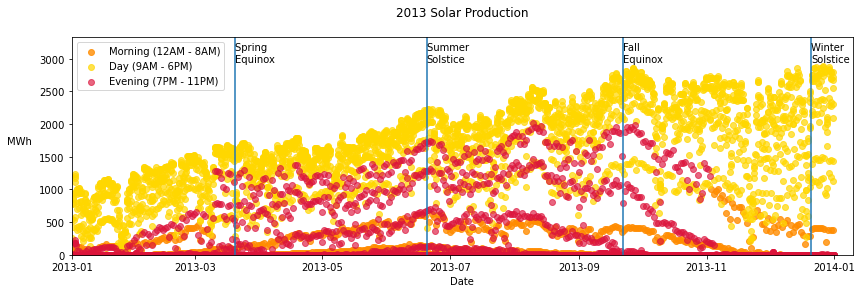

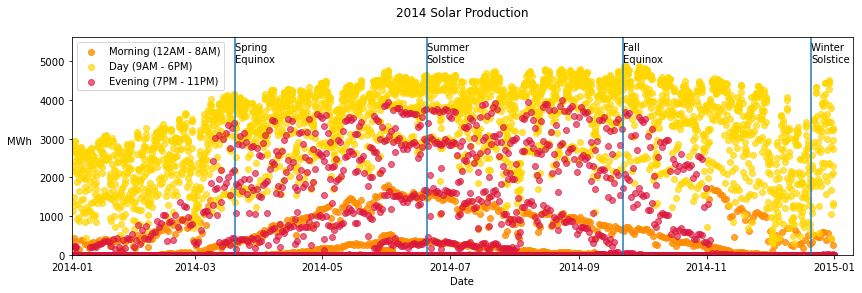

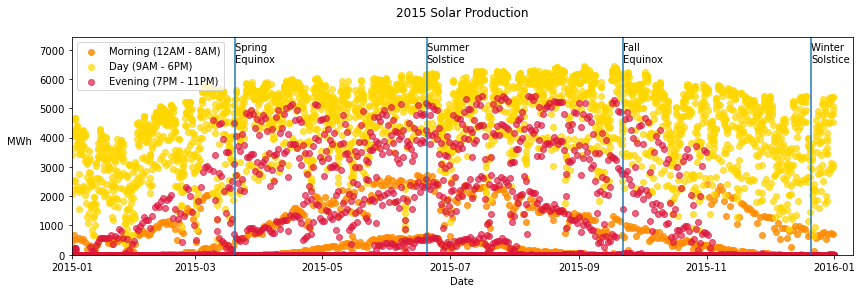

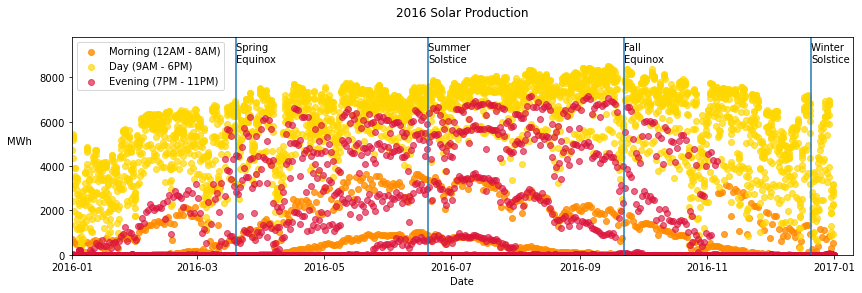

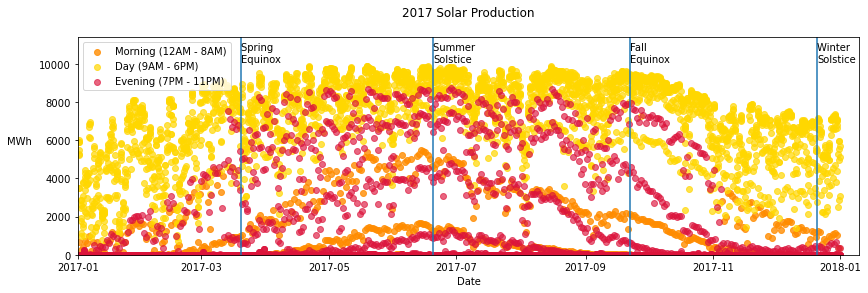

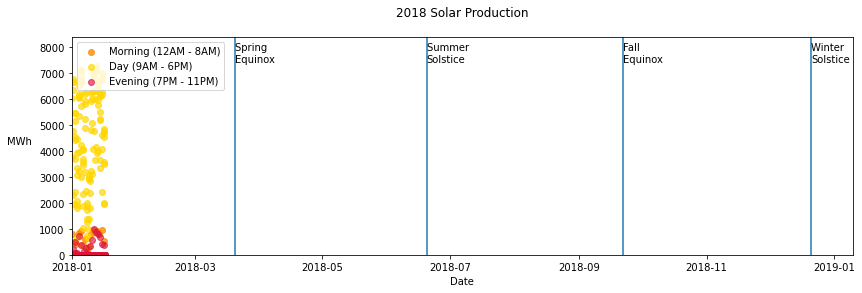

In [41]:
## Lets take a look at the total solar production per year in the entire data set 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

for year in range(2011,2019):
    data = full_data.loc[full_data['YEAR']==year,:]
    hour = data.loc[:,'Hour'].values
    mask_morning = ((hour < 9))
    mask_day = ((hour >= 9)&(hour <= 16))
    mask_evening = ((hour >16))
    x = data['TIMESTAMP']
    y = data['SOLAR TOTAL']
    plt.figure(figsize=(14,4))
    plt.scatter(x[mask_morning], y[mask_morning],c='#FF8C00',alpha=.8,label='Morning (12AM - 8AM)')
    plt.scatter(x[mask_day], y[mask_day],c='#FFD700',alpha=.7,label='Day (9AM - 6PM)')
    plt.scatter(x[mask_evening], y[mask_evening],c='#DC143C',alpha=.65,label='Evening (7PM - 11PM)')
    plt.ylim(0,y.max()*1.15)
    plt.xlim(pd.to_datetime('01/01/{}'.format(year)),pd.to_datetime('01/10/{}'.format(year+1)))
    plt.ylabel('MWh ',rotation='0',ha='right')
    plt.xlabel('Date')
    plt.title('{} Solar Production\n'.format(year))
    plt.legend(loc='upper left')
    seasons = [(pd.to_datetime('June 20, {}'.format(year)), 'Summer \nSolstice'),
           (pd.to_datetime('December 21, {}'.format(year)), 'Winter \nSolstice'),
           (pd.to_datetime('September 22, {}'.format(year)), 'Fall \nEquinox'),
           (pd.to_datetime('March 20, {}'.format(year)), 'Spring \nEquinox')]
    for date,season in seasons:
        plt.axvline(date)
        plt.text(date,y.max()*1.02,season)
    plt.savefig('Charts/{}_solar_production_seasons.png'.format(year))
    plt.show()

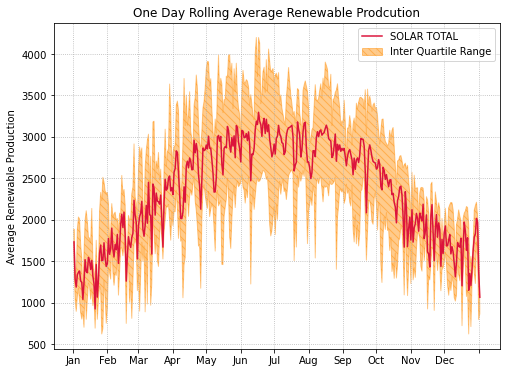

In [62]:
# Create some grouped tables for analysis and charting - we're only concerning ourselves with SOLAR TOTAL PRODUCTION 
# group to the year and month, calculate sum of total solar production, and sum of individual solar production types


import matplotlib.dates as mdates
months = mdates.MonthLocator()

chart = full_data.loc[full_data.TIMESTAMP >= pd.to_datetime('2015-01-01'),['TIMESTAMP','SOLAR TOTAL']]
chart.set_index(pd.DatetimeIndex(chart['TIMESTAMP']),inplace=True)
chart.drop(columns=['TIMESTAMP'], inplace=True)

season = chart.rolling(window=24, center=True, min_periods=20).mean().groupby(chart.index.dayofyear).mean()
q25 = chart.rolling(window=24, center=True, min_periods=20).mean().groupby(chart.index.dayofyear).quantile(.25)
q75 = chart.rolling(window=24, center=True, min_periods=20).mean().groupby(chart.index.dayofyear).quantile(.75)



f, ax = plt.subplots(figsize=(8,6))

ax.fill_between(season.index,q25.values.ravel(),q75.values.ravel(),color='#FF8C00',hatch='\\\\\\', alpha=0.45, label='Inter Quartile Range')
season.plot(ax=ax, color='#DC143C')
month_list = pd.date_range('06/01/2015','09/22/2019 23:00:00',freq='24H')
ax.set_xlabel('Day Of Year')
ax.set_ylabel('Average Renewable Production')
ax.set_title('One Day Rolling Average Renewable Prodcution')
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
ax.set_xlabel('')
ax.xaxis.set_major_locator(months)
ax.set_xticklabels(month_names)
ax.grid(ls=':')
plt.legend()

plt.savefig('Charts/rollingAvg_solar.png')
plt.show()

In [65]:
# Create a dataframe to generate a boxplot from, looking at the average production values across days and months

chart['month'] = chart.index.month
chart['hour'] = chart.index.hour


grouped = chart.groupby(['month','hour']).mean().unstack()
grouped.columns = grouped.columns.droplevel(0)


grouped.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
1,0.110092,0.110092,0.128440,0.128440,0.155963,0.733945,2.009174,594.366972,2357.293578,3660.422018,...,3634.311927,2389.165138,525.541284,7.366972,6.899083,6.183486,5.275229,1.981651,0.110092,0.119266
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.035294,1375.505882,3602.000000,4867.364706,...,4861.600000,3916.494118,1860.988235,2.294118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.033333,0.000000,0.000000,0.000000,0.000000,0.088889,104.344444,1359.600000,3758.188889,5424.088889,...,5940.477778,5439.600000,4239.477778,2176.266667,513.044444,7.911111,5.522222,4.533333,1.400000,0.944444
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.577778,177.588889,1900.988889,4362.266667,5788.111111,...,6533.111111,6143.288889,5402.355556,3933.377778,1387.866667,35.522222,1.744444,0.000000,0.000000,0.000000
5,0.677419,0.698925,0.709677,0.645161,1.354839,2.258065,697.956989,3039.053763,5198.301075,6294.763441,...,6818.236559,6404.333333,5644.870968,4392.731183,2150.043011,192.365591,2.344086,1.086022,1.096774,0.677419


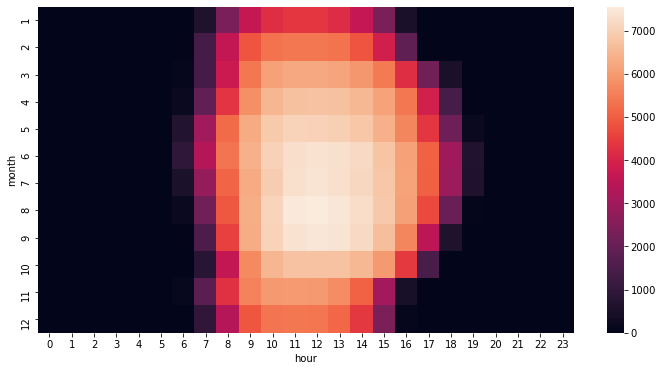

In [66]:
# plot the heatmap 
f, ax = plt.subplots(figsize=(12,6))
month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul']
sns.heatmap(grouped, ax=ax)
plt.savefig('Charts/solar_heatmap.png')
plt.show()


In [49]:
# Create another grouped dataframe for charting
hour_grouped = full_data.groupby('Hour')
hour_sum = pd.DataFrame(hour_grouped['SOLAR TOTAL'].mean())
hour_sum['SOLAR PV'] = hour_grouped['SOLAR PV'].mean()
hour_sum['SOLAR THERMAL'] = hour_grouped['SOLAR THERMAL'].mean()
hour_sum.head()

,SOLAR TOTAL,SOLAR PV,SOLAR THERMAL
Hour,,,
1.0,0.350497,0.029119,0.055043
2.0,0.282315,0.029119,0.051136
3.0,0.204190,0.025213,0.013849
4.0,0.167259,0.021307,0.006037
5.0,0.535156,0.406250,0.008168


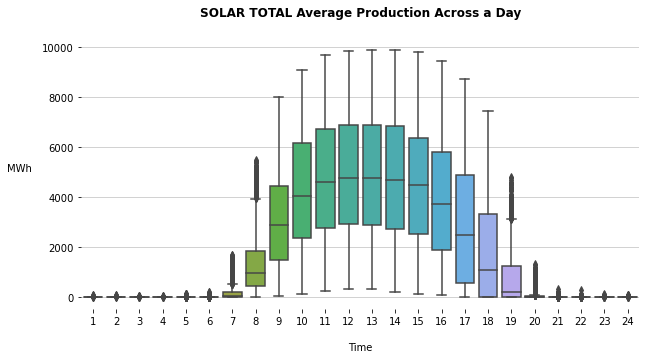

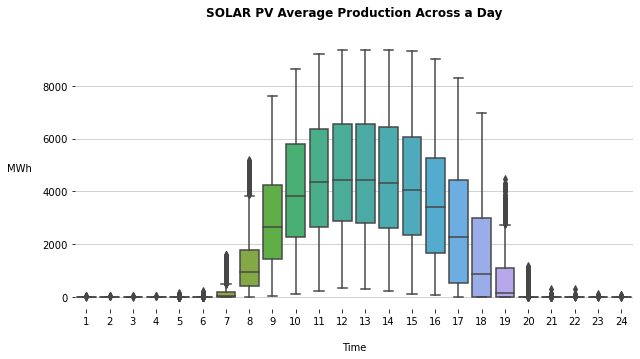

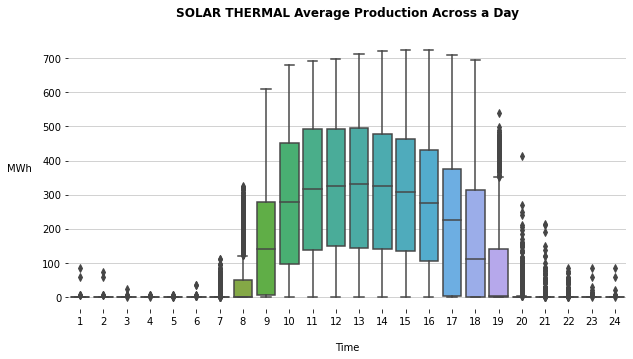

In [61]:
# create some plots to look at the general daily trend in solar production 

partial_data = pd.DataFrame(full_data.loc[full_data.TIMESTAMP > pd.to_datetime('2012-12-31'),['SOLAR TOTAL','SOLAR PV','SOLAR THERMAL','Hour']])
partial_data.Hour = partial_data.Hour.map(lambda x : int(x))
for i in partial_data.columns[:-1]: #don't want to plot hour against hour, all but last column
    plt.figure(figsize=(10,5))
    sns.boxplot(partial_data['Hour'],partial_data[i])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().set_axisbelow(True)
    plt.gca().grid(axis='y',alpha=.7)

    plt.title('{} Average Production Across a Day\n'.format(i),fontweight='bold')

    plt.xlabel('\nTime')

    plt.ylabel("MWh  ",rotation='0',ha='right')
    plt.savefig('Charts/{}_average_daily_production.png'.format(i),bbox_inches = "tight")

plt.show()